# Session 3: Getting to Know Your Data – Comparing groups & measuring inequality with R
### Data analysis for Economics and Management (Academic Course 2025-2026)

Alba Miñano-Mañero (alba.minano@iseg.ulisboa.pt)

Today’s session builds on your R skills to help you summarize, compare, and interpret data across groups, as well as explore measures of inequality. We'll begin by reviewing how to generate descriptive statistics and compare differences between two or more samples. Then, we’ll introduce tools to visualize those differences, including boxplots and density plots. Finally, we’ll explore the Gini index and Lorenz curves as ways to represent and quantify inequality.

As part of our basics of programming, we’ll also learn about the main data structures in R—such as vectors, lists, data frames, and matrices. 

We’ll also cover how to use the natural logarithm transformation to handle skewed data—an important technique when working with income or wealth distributions.

We'll devote the final part of the session to exam-style practice questions using Qiseflow, giving you a chance to apply what you've learned in a more applied context.

By the end of this session, you should be able to:

1. Compute and interpret basic descriptive statistics by group

2. Use R to compare two or more samples using summaries and plots

3. Visualize group differences using boxplots, density plots, and histograms

4. Apply and interpret the log transformation to address skewed variables

5. Calculate the Gini index and draw Lorenz curves


## 1. Data structures in R 

Last week, we explored the fundamental types of data in R—such as numeric, character, logical, and factor. Today, we shift our focus to containers: the data structures R uses to store and organize data efficiently.

Just as understanding data types is essential, having a clear grasp of the various data structures is crucial because many R functions are designed to work with specific structures. Knowing which container to use and how it behaves will help you write more effective and error-free code.

1. **Vectors**

    Vectors are one-dimensional, ordered collections of elements that all share the same data type—making them homogeneous data structures. 
    Each element in a vector has a specific position (or index), and the vector has a defined length. Because all elements must be of the identical type, vectors can't store not a mix of types.


In [1]:
nums <- c(1, 2, 3, 4)          # numeric vector
chars <- c("apple", "banana") # character vector
logic <- c(TRUE, FALSE)       # logical vector

In [2]:
nums
chars
logic

[1] 1 2 3 4

[1] "apple"  "banana"

[1]  TRUE FALSE

To access elements, use square brackets and index from 1 (R starts counting at 1):

In [3]:
nums[1]   # first element
nums[-2]  # all except second

[1] 1

[1] 1 3 4

2. **Lists**

    Lists are one-dimensional, ordered collections of objects that can be of different types—making them heterogeneous data structures. That is,  lists can hold a mix of data types within the same structure. For example, a list can contain vectors, matrices, characters, functions, or even other lists. You create a list using the `list()` function:

In [4]:
this_is_list <- list('a', 2, list('a', TRUE))
print(this_is_list)

[[1]]
[1] "a"

[[2]]
[1] 2

[[3]]
[[3]][[1]]
[1] "a"

[[3]][[2]]
[1] TRUE




You can access elements of a list using double square brackets [[ ]] for individual elements or single brackets [ ] to get sublists:


In [5]:

this_is_list[[3]]  # Accesses the 3rd element, which is a nested list
this_is_list[1:2]  # Accesses the first two elements, returns a sublist

[[1]]
[1] "a"

[[2]]
[1] TRUE

[[1]]
[1] "a"

[[2]]
[1] 2

You can add elements by assigning to a new position:

In [6]:
this_is_list[[4]] <- list('a','b','c')
this_is_list
this_is_list[[5]] <- 'hello'
this_is_list

[[1]]
[1] "a"

[[2]]
[1] 2

[[3]]
[[3]][[1]]
[1] "a"

[[3]][[2]]
[1] TRUE


[[4]]
[[4]][[1]]
[1] "a"

[[4]][[2]]
[1] "b"

[[4]][[3]]
[1] "c"

[[1]]
[1] "a"

[[2]]
[1] 2

[[3]]
[[3]][[1]]
[1] "a"

[[3]][[2]]
[1] TRUE


[[4]]
[[4]][[1]]
[1] "a"

[[4]][[2]]
[1] "b"

[[4]][[3]]
[1] "c"


[[5]]
[1] "hello"

To insert an element in a specific position, you can combine list slices:

In [7]:
this_is_list <- append(this_is_list, 'Hola', after = 1) 
this_is_list

[[1]]
[1] "a"

[[2]]
[1] "Hola"

[[3]]
[1] 2

[[4]]
[[4]][[1]]
[1] "a"

[[4]][[2]]
[1] TRUE


[[5]]
[[5]][[1]]
[1] "a"

[[5]][[2]]
[1] "b"

[[5]][[3]]
[1] "c"


[[6]]
[1] "hello"

Notice that `append(this_is_list, 'Hola', after = 1) ` is telling to  inserts the value "Hola" into the list `this_is_list` after the first element.

You can remove elements by setting them to NULL:

In [8]:
this_is_list[[2]] <- NULL  # Removes the 2nd element
this_is_list

[[1]]
[1] "a"

[[2]]
[1] 2

[[3]]
[[3]][[1]]
[1] "a"

[[3]][[2]]
[1] TRUE


[[4]]
[[4]][[1]]
[1] "a"

[[4]][[2]]
[1] "b"

[[4]][[3]]
[1] "c"


[[5]]
[1] "hello"

3. **Matrices**

    Just like in real life, a matrix in R is a two-dimensional, homogeneous data structure. This means it stores elements of the same type (e.g., all numeric or all character) in a rectangular layout—with rows and columns. Rows run horizontally, columns run vertically


In [9]:
A <- matrix(
  c(1, 2, 3, 4, 5, 6, 7, 8, 9), #
  nrow = 3, 
  ncol = 3, 
  byrow = TRUE
)
A

1,2,3
4,5,6
7,8,9


Let’s break it down:
- `matrix()`: tells R to reshape a vector in a matrix with a given number of rows and columns.
- `c(1, 2, 3, 4, 5, 6, 7, 8, 9)`  vector we want as matrix. 
- `nrow = 3` specifies that the matrix should have 3 rows.
- `ncol = 3` specifies 3 columns.
- `byrow = TRUE` means that the filling of the matrix should happen row by row (horizontally), instead of the default column-wise (vertically). 
If you had written `byrow = FALSE` (or left it out), R would instead fill the matrix column by column, so the first column would be `(1,2,3)` rather than `(1,4,7)`


4. **Arrays**

    An array is a multi-dimensional data structure in R that stores elements of the same type (i.e., it’s homogeneous). You can think of an array as an extension of a matrix:

    - A matrix is a special case of an array that has exactly two dimensions (rows and columns).

    - An array can go beyond that, holding data in 3D, 4D, or even more dimensions.

In [10]:
A <- array(
  c(1, 2, 3, 4, 5, 6, 7, 8), 
  dim = c(2, 2, 2)
)
A
str(A)

, , 1

     [,1] [,2]
[1,]    1    3
[2,]    2    4

, , 2

     [,1] [,2]
[1,]    5    7
[2,]    6    8

 num [1:2, 1:2, 1:2] 1 2 3 4 5 6 7 8


If we check the dimensions: 

In [11]:
dim(A)

[1] 2 2 2

This creates a 3D array with:
- 2 rows
- 2 columns
- 2 layers (or matrices)

That it, it holds two 2×2 matrices, stacked on top of each other.

Why use arrays?

- When your data naturally fits into a higher-dimensional format (like time-series across multiple variables and groups).

- When you need to organize homogeneous data beyond just rows and columns.

5. **Data Frame**:

    A data frame is one of the most commonly used data structures in R for data analysis. You can think of it as a table, similar to what you'd see in Excel or a spreadsheet. Each column is a vector, and each row is an observation. Columns can hold different data types (numeric, character, factor, etc.), but each column must be of one type only. In short, it's a 2D heterogeneous data structure — unlike a matrix (which is homogeneous).

    To create a data frame we call the `data.frame()` function

In [12]:
df <- data.frame(
  name = c("Alice", "Bob", "Charlie"),
  age = c(25, 30, 22),
  is_student = c(TRUE, FALSE, TRUE)
)

df

name,age,is_student
<chr>,<dbl>,<lgl>
Alice,25,TRUE
Bob,30,FALSE
Charlie,22,TRUE


This creates a data frame with 3 columns (name, age, is_student) and 3 rows (Alice, Bob, Charlie). Notice that each column is a different data type (character, double and logical)

Some basic operations: 

- **Vieweing the data**

In [13]:

print(df)         # view the whole data frame
head(df)          # view the first 6 rows
str(df)           # structure of the data frame
summary(df)       # summary statistics

     name age is_student
1   Alice  25       TRUE
2     Bob  30      FALSE
3 Charlie  22       TRUE


,name,age,is_student
,<chr>,<dbl>,<lgl>
1,Alice,25,TRUE
2,Bob,30,FALSE
3,Charlie,22,TRUE


'data.frame':	3 obs. of  3 variables:
 $ name      : chr  "Alice" "Bob" "Charlie"
 $ age       : num  25 30 22
 $ is_student: logi  TRUE FALSE TRUE


     name                age        is_student     
 Length:3           Min.   :22.00   Mode :logical  
 Class :character   1st Qu.:23.50   FALSE:1        
 Mode  :character   Median :25.00   TRUE :2        
                    Mean   :25.67                  
                    3rd Qu.:27.50                  
                    Max.   :30.00                  

- **Acessing columns**:

In [14]:
df$name           # access column by name
df[["age"]]       # another way to access a column
df[,2]            # access second column

[1] "Alice"   "Bob"     "Charlie"

[1] 25 30 22

[1] 25 30 22

- **Accessing rows**

In [15]:
df[1, ]           # dirst row, all columns
df[2:3, ]         # rows 2 and 3, all columns

,name,age,is_student
,<chr>,<dbl>,<lgl>
1,Alice,25,TRUE


,name,age,is_student
,<chr>,<dbl>,<lgl>
2,Bob,30,FALSE
3,Charlie,22,TRUE


- **Accessing elements**

In [16]:
df[2, "name"]     # second row, column name
df[3, 2]          # third row, second column

[1] "Bob"

[1] 22

- **Adding columns**

    We can do this by assigning to a new column a vector. 

In [17]:
df$country <- c("Portugal", "Spain", "France")

- **Filtering rows with conditions**

In [18]:
df[df$age > 24, ]       # select rows where age > 24
df[df$is_student == TRUE, ]  # only students

,name,age,is_student,country
,<chr>,<dbl>,<lgl>,<chr>
1,Alice,25,TRUE,Portugal
2,Bob,30,FALSE,Spain


,name,age,is_student,country
,<chr>,<dbl>,<lgl>,<chr>
1,Alice,25,TRUE,Portugal
3,Charlie,22,TRUE,France


- **Modify elements**

In [19]:
df[1, "age"] <- 26      # Change Alice's age to 26

- **Remove columns**

    Assign a column the `NULL` value

In [20]:
df$country <- NULL      # remove the 'country' 
df$country

NULL

In [21]:
df

name,age,is_student
<chr>,<dbl>,<lgl>
Alice,26,TRUE
Bob,30,FALSE
Charlie,22,TRUE


We often need to combine multiple data frames. There are two main ways to do this:

- Appending: adding rows (stacking, vertical)
- Merging: joining based on common columns or keys (horizontal matching)

**Appending**

Use `rbind()` to append one data frame below another, as long as the column names and types match. If the column names or types don’t match, it will throw an error:

In [22]:
df1 <- data.frame(
  id = c(1, 2),
  name = c("Alice", "Bob")
)

df2 <- data.frame(
  id = c(3, 4),
  name = c("Charlie", "Diana")
)

df_combined <- rbind(df1, df2)
df_combined

id,name
<dbl>,<chr>
1,Alice
2,Bob
3,Charlie
4,Diana


**Merging**

Use `merge()` to join data frames by one or more columns. Merges can be *inner* (keys in both data frames), *left* (only keys on the left), *right* (only keys on the right), *outer* (matching and non matching). 

In [23]:
students <- data.frame(
  id = c(1, 2, 3),
  name = c("Alice", "Bob", "Charlie")
)

grades <- data.frame(
  id = c(2, 3, 4),
  grade = c("A", "B", "C")
)

merged_df <- merge(students, grades, by = "id") # merge students (left dataframe) with grades (right dataframe) checking same id columns

In [24]:
merged_df

id,name,grade
<dbl>,<chr>,<chr>
2,Bob,A
3,Charlie,B


By default, this performs an inner join (only keeps rows with matching ids in both data frames). Other merge options:

- `all = TRUE`: outer join (includes all row, even if they don't match)

- `all.x = TRUE`: left join (all from the first df, matching from the second)

- `all.y = TRUE`: right join (all from the second df, matching from the first )

For instance, if we run the merge on the left, Alice will appear with a missing value because the second data frame does not have a value for `id` 1. 

In [25]:
merge(students, grades, by = "id", all.x = TRUE)

id,name,grade
<dbl>,<chr>,<chr>
1,Alice,NA
2,Bob,A
3,Charlie,B


With this, we finish our daily basics of R programming. Now we return to our main goal: using R for data analysis

## 2. Comparing samples and plotting differences. 

Let’s go through a simple example using a ficticious data frame with grades of different groups. 

In [26]:
library(readxl)
grades = read.csv("data/session_3/grades_example.csv")

In [27]:
grades

class,score
<chr>,<dbl>
A,13.879049
A,14.539645
A,18.117417
A,15.141017
A,15.258575
A,18.430130
A,15.921832
A,12.469878
A,13.626294


Let's start by comparing the descritive statistics. Because we are interested in differences between samples, what we want to do is compare summary statistics between groups. In our case, we want to understand how scores vary by class (e.g., Class A vs Class B). This means we don’t just want a single overall average — we want to compute things like the mean, standard deviation, or other summary statistics for each class separately.

To do this efficiently in R, we use the `aggregate()` funciton. For instance

```r
aggregate(score ~ class, data = df, FUN = mean)
```
does the following: 

- groups the data by the class variable. Each unique value in class (e.g., "A", "B", etc.) becomes its own group.

- Applies a function to each group. In this case, it applies the mean() function to the score variable within each class.

- Returns a summary table: the result is a new data frame with one row per group, showing the computed statistic (mean score) for each class. 



In [28]:
aggregate(score ~ class, data = grades, FUN = mean)

class,score
<chr>,<dbl>
A,15.28325
B,11.74371


At first glance, the average score for Class A (15.28) is higher than that for Class B (11.74). This suggests that students in Class A performed better on average.

However, a difference in means doesn't tell the whole story. There are several reasons why this difference might occur:

- Consistently lower scores in B
    Everyone in Class B might just be scoring lower across the board.
- Outliers 
    One or two very low scores in Class B might be pulling the average down/ vice versa in A
- Wider Spread of Scores
    Class B might have greater variation — some high and some low scores — leading to a lower average even if the performance is mixed.

To understand the distribution of values in each group, we need to go beyond the mean. That’s why our next step is to calculate and compare the standard deviation — a measure of how spread out the scores are in each class.

This will help us answer questions like:

- Are the scores tightly grouped or very spread out?
- Is the difference in means meaningful or just due to variability?

Let's just use the aggregate function to obtain the standard deviation. 


In [29]:
aggregate(score ~ class, data = grades, FUN = sd)

class,score
<chr>,<dbl>
A,1.945331
B,4.149693


In A, student scores are closely clustered around the mean of 14.75. This suggests that most students in Class A performed similarly, with scores close to each other. In B, scores are much more spread out around the mean of 11. This suggests greater variability — some students may have done quite well, others poorly. 


The larger spread in B means that the lower average might be driven by a few very low scores, rather than the whole group performing poorly.

So, the standard deviation helps us qualify the mean: while A performs better on average, B's lower average might be hiding a more complex distribution — one that includes outliers or mixed results.

> **Note**: we could have obtained the same using the `dplyr` library. 
> ```r
> library(dplyr)
>
>df %>%
>   group_by(class) %>%
>    summarise(
>        mean_score = mean(score),
>        sd_score = sd(score)
>    )
> ```

Let's visualize the distribution: 

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


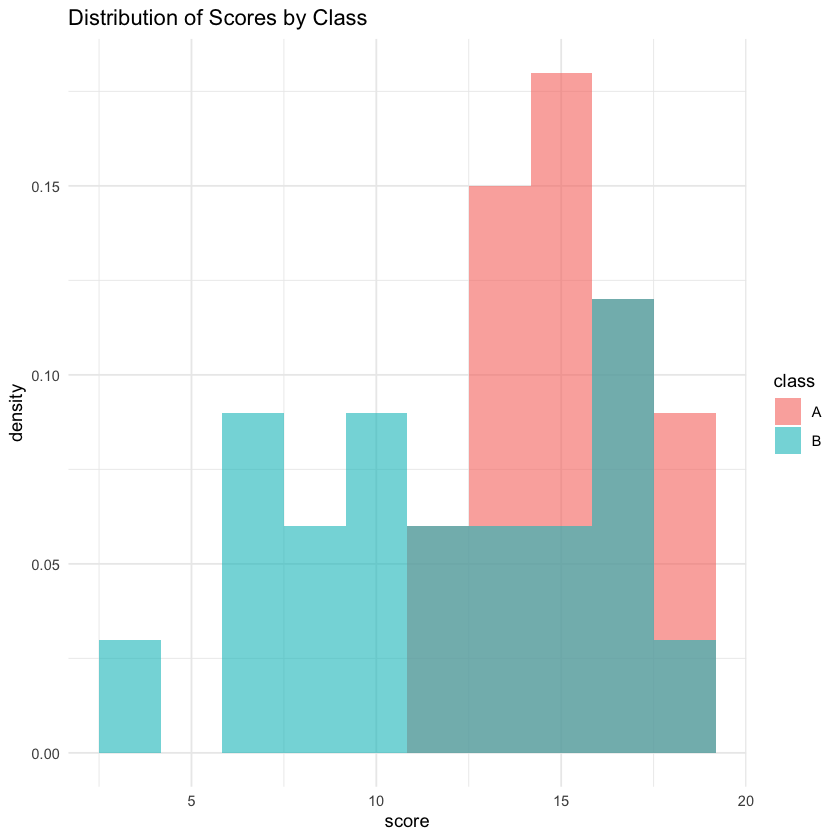

In [30]:
library(ggplot2)

ggplot(grades, aes(x = score, fill = class, y=..density..)) +
  geom_histogram(alpha = 0.6, position = "identity", bins = 10) +
  labs(title = "Distribution of Scores by Class") +
  theme_minimal()



Understanding the syntaxis: 
1. `ggplot(df, aes(...))`
    We initialize the plot using the dataframe **grades**. The `aes()` function defines the aesthetic mappings:

    - `x = score`: x-axis shows the variable score.

    - `fill = class`: bars are colored (filled) based on the class variable, so each class will have a different color.

    - `y = ..density..`: y-axis shows the density (histogram!!), which allows comparison of distributions with different sample sizes.

2. `geom_histogram(...)`
    Adds histogram bars to the plot, with these options:

    - `alpha = 0.6`: set transparency of the bars (60%) so overlapping bars are easier to see.

    - `position = "identity"`: bars for different classes are overlaid directly on top of each other, not stacked.

    - `bins = 10`: divides the x-axis into 10 bins to group the scores.

3. `labs(title = "Distribution of Scores by Class")`
    Adds a title to the plot.

4. `theme_minimal()`
    Minimal theme to the plot for clarity.

**Interpreting the histogram**
- Class A:
    The scores are concentrated mostly above 10, showing that most students in Class A have relatively high scores. The density is focused in this higher range, indicating a generally better performance or less variability in lower scores.

-  Class B:
    The distribution is more spread out with density in very low and very high observations. THis shows that, many students have low scores and some students perform very well. 

- Because the histogram uses density instead of raw counts, you can compare the shape of the distributions even if the classes have different numbers of students.

We obtain a similar interpretation with the boxplot. 

In [31]:
ggplot(df, aes(x = class, y = score, fill = class)) +
  geom_boxplot(alpha = 0.7) +
  labs(title = "Score Comparison Between Classes") +
  theme_minimal()

ERROR while rich displaying an object: Error in `geom_boxplot()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'score' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 

Let's see how we interpret the boxplot: 

- **Median & Central Tendency**:  
  The thick line inside each box represents the median score for each class.
  - A’s median score is **higher**, confirming that A generally performs better (i.e., 50% of its students score above 15 vs. 12 in B)

- **Interquartile Range (IQR)**:  
  The box spans from the 25th percentile (Q1, 25% of observations below) to the 75th percentile (Q3, 75% of observation below), showing the middle 50% of scores.
  - Class A’s box is **narrower**, indicating less variability among most students’ scores.
  - Class B’s box is **wider**, indicating greater spread and variability.

- **Whiskers & Outliers**:  
  Whiskers extend to show the range of scores excluding outliers.
  - B’s whiskers are longer on the lower end, showing some students score much lower than the central 50% of observations. 

- **Overall**:  
  The boxplot visually confirms what we saw in the histogram and descriptive statistics:  
  - A tends to have consistently higher and less variable scores.  
  - B has more variability and possibly outliers, with a broader range of performance.

## 3. Inequality measure: Gini index & Lorenx curve. 

In the next part of our session we are going to see how to obtain inequality measure. But first, what is the difference between dispersion and inequality/concentration measures?

In the next part of our session, we are going to see how to obtain inequality measures. But first, what is the difference between dispersion and inequality/concentration measures?

**Dispersion measures**—like variance and standard deviation—capture how spread out values are around the mean. They tell us about the overall variability within a dataset but don’t provide information about how values are distributed relative to each other.

**Inequality or concentration measures**, such as the Gini index and Lorenz curve, focus on the relative distribution of values across individuals or groups. They reveal whether values (like income or wealth) are concentrated among a few or evenly distributed throughout the population.

Let's briefly recap the concentration measures we've seen in theory class:

- The **Lorenz curve** graphically represents the cumulative share of the total income (or value) held by the bottom x% of the population, helping us visualize inequality.
- The **Gini index** summarizes this inequality as a single number between 0 (perfect equality, everyone has the same) and 1 (maximum inequality, one individual has everything, others nothing)

❓**What is the relationship between the Lorenz curve and the Gini index?**

As always, we start by loading our packages and our data, which will be the distribution of wages of the second session. 

In [32]:
library(DescTools)  # for Gini index calculation
library(ineq)       # for Lorenz curve plotting
data = read_excel("data/session_2/education_wage.xlsx")

Registered S3 methods overwritten by 'ineq':
  method   from     
  plot.Lc  DescTools
  lines.Lc DescTools


Attaching package: ‘ineq’


The following objects are masked from ‘package:DescTools’:

    Atkinson, Gini, Herfindahl, Lc, Rosenbluth




Let's start with the Gini index: 

In [33]:
gini_index <- Gini(data$"Monthly wage (Eur)")  # replace your_variable with the actual variable name
print(gini_index)

[1] 0.1585174


A value of 0.15 in the Gini index suggests that the values are fairly evenly distributed among the population.

Let's go the Lorenz Curve:

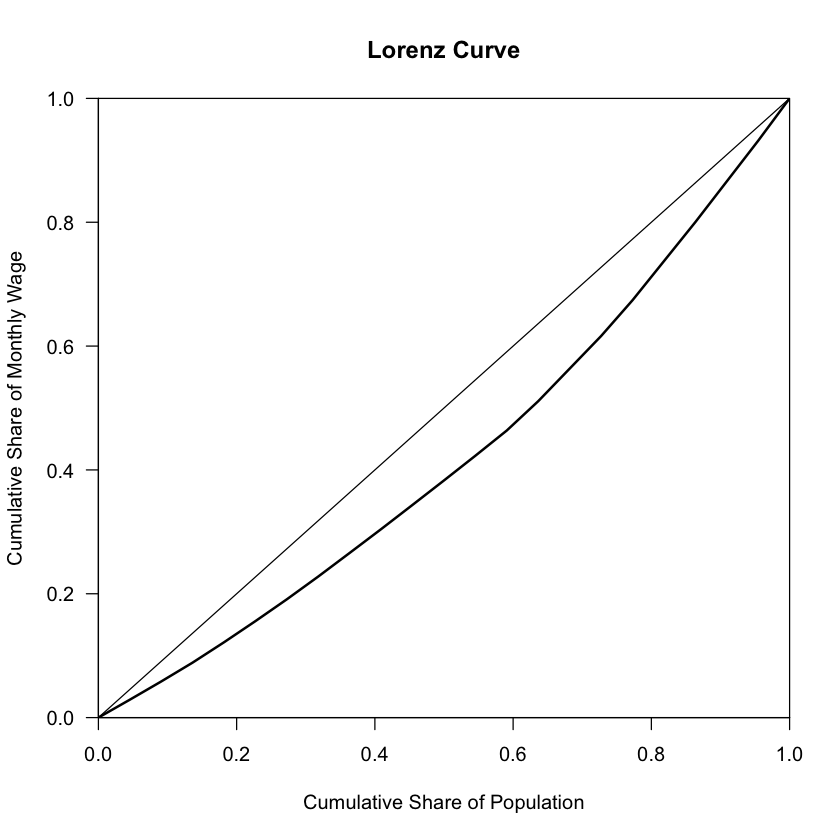

In [34]:
lorenz_curve <- Lc(data$`Monthly wage (Eur)`)
plot(lorenz_curve, 
     main = "Lorenz Curve", 
     xlab = "Cumulative Share of Population", 
     ylab = "Cumulative Share of Monthly Wage")

The Lorenz curve plots the cumulative share of the population (x-axis) against the cumulative share of the variable of interest (e.g., income) they hold (y-axis).

- The **45-degree line** (the diagonal) represents **perfect equality**, where each percentage of the population holds an equal percentage of the total value.
- The further the Lorenz curve bows away from this 45-degree line, the greater the inequality in the distribution.

From the plotted Lorenz curve, we can see that the curve lies close to the 45-degree line, indicating relatively low inequality in the distribution of the variable. This matches the low Gini index value, confirming that most of the population holds a similar share of the total value.

In [35]:
ggplot(df, aes(x = group, y = income, fill = group)) +
  geom_boxplot(alpha = 0.6) +
  theme_minimal() +
  theme(
    axis.title.x = element_blank(),
    axis.text.x = element_blank(),
    legend.position = "none"
  ) +
  labs(title = "Income Distribution by Group (Groups Hidden)")

ERROR while rich displaying an object: Error in `geom_boxplot()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'group' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 